# Credit Card Fraud Detection

## Table of Contents

1. [Library Management](#header1_1)
2. [Data Sourcing](#header1_2)
3. [Data Cleaning](#header1_3)
4. [Univariate / Bivariate Analysis](#header1_4)
5. [Data Preprocesing for Modelling](#header1_5)
6. [Data Modelling on Sampled Data](#header1_6)
    - 1. [Logistic Regression](#header2_6_1)
    - 2. [Decision Trees](#header2_6_2)
    - 3. [Random Forest](#header2_6_3)
    - 4. [Gradient Boosting](#header2_6_4)
    - 5. [XG-Boost](#header2_6_5)
7. [Random Oversampling](#header1_7)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
8. [Uniform Oversampling](#header1_8)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
9. [Synthetic Minority Oversampling Technique (SMOTE)](#header1_9)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
10. [Adaptive Synthetic (ADASYNC)](#header1_10)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
11. [Final Evaluation Metrics](#header1_11)

# 1. <a id="header1_1">Library Management</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tabulate==0.8.9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [4]:
sns.set(rc={'figure.figsize':(15,8)})

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from xgboost import XGBClassifier

# 2. <a id="header1_2">Data Sourcing</a>

In [12]:
input_file_path = '../data/creditcard.csv'

In [13]:
raw_data = pd.read_csv(input_file_path)

In [14]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. <a id = "header1_3">Data Cleaning</a>

In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### From the above information, we can say that, there is no need for data cleansing as there are no null / empty / missing values.

#### Furthermore, we can proceed ahead towards variable analysis

# 4. <a id = "header1_4">Univariate / Bivariate Analysis</a>

## 4.1. Pre-Defined Fucntions for Univariate / Bivariate analysis

In [16]:
def plot_bar_graph_from_series(series, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    """
    Plots the Bar Graph with appropriate X / Y axis labels, graph title and data labels.
    Arguments:
    - series: Accepts pandas series or a column from pandas dataframe
    - plot_title: Title to be diaplyed for graph
    - x-axis label: Label to be displayed on X-Axis
    - y-axis label: Label to be displayed on Y-Axis
    - x_axis_label_rotation: Angle at which x-axis labels needs to be rotated
    - y_axis_label_rotation: Angle at which y-axis labels needs to be rotated
    - data_label_rotation: Angle at which data labels (above the bar) needs to be rotated    
    
    """
    graph = sns.barplot(x=series.index, y=series.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = series.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

In [17]:
def plot_box_graph(series, plot_type='box'):
    """
    This function is use to plot Box Plot for continuous numerical variable
    Arguments
    - series: Accepts pandas series or a column from pandas dataframe
    - plot_type: To plot either box plot or distribution plot
    """
    if plot_type == 'box':
        plt.figure(figsize=(16,5))
        sns.boxplot(series)
    elif plot_type == 'dist':
        plt.figure(figsize=(15,8))
        sns.distplot(raw_data.V1)
    else:
        raise ValueError('Plot type can be either a "box" (for Box Plot) or "dist" (for Distribution Plot)')
    plt.title('Distribution of ' + str(series.name), fontdict={'fontsize': 20})
    plt.xlabel(series.name, fontdict={'fontsize': 15})
    plt.show()    

In [18]:
def check_class_distribution_on_handling_outlier(series_name, quantile_val_low=0.0, quantile_val_high=1.0):
    """
    This function id used to check the distribution of class on removing outliers.
    This function calculates the class count falling in range between quantile_val_low & quantile_val_high
    Arguments
    - series_name: Name of the column on which outlier treatment is to be done
    - quantile_val_low: Lower quantile value
    - quantile_val_high: Hiher quantile value
    
    """
    class_count_on_removing_outlier = raw_data[(raw_data[series_name] >= raw_data[series_name].quantile(quantile_val_low)) & (raw_data[series_name] <= raw_data[series_name].quantile(quantile_val_high))].Class.value_counts()
    class_1_drop = (raw_class_value_dist[1] - class_count_on_removing_outlier[1])/raw_class_value_dist[1] * 100
    # print('Percentage of Class 1 values dropped after outlier treatment ==>', round(class_1_drop, 2))
    
    class_0_drop = (raw_class_value_dist[0] - class_count_on_removing_outlier[0])/raw_class_value_dist[0] * 100
    # print('Percentage of Class 0 values dropped after outlier treatment ==>', round(class_0_drop, 2))
    
    headers = ['Class', 'Raw Data\nValue Count', 'Data Values\nRETAINED after\nOutlier Treatment','Data Values\nDROPPED after\nOutlier Treatment','Percent Drop\nIn Data Values']
    table = [
        ['Class 0', str(raw_class_value_dist[0]), str(class_count_on_removing_outlier[0]), str(raw_class_value_dist[0]-class_count_on_removing_outlier[0]), str(round(class_0_drop, 2)) + " %"],
        ['Class 1', str(raw_class_value_dist[1]), str(class_count_on_removing_outlier[1]), str(raw_class_value_dist[1]-class_count_on_removing_outlier[1]), str(round(class_1_drop, 2)) + " %"]
    ]
    print(tabulate(table, headers, tablefmt="grid", colalign=("center", "center", "center", "center", "center")))

## 4.2. Class

#### While looking at the data, we see that Class column corresponds to Credit Card Fraud value. Therefore we will analyse this column first

#### Data Interpretation
1. Class 0 ==> No Fraud
2. Class 1 ==> Fraud

In [19]:
raw_class_value_dist = raw_data.Class.value_counts()
raw_class_value_dist

0    284315
1       492
Name: Class, dtype: int64

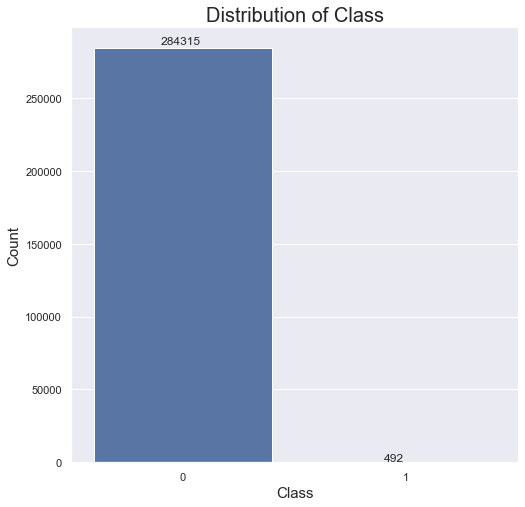

In [20]:
plt.figure(figsize=(8,8))
ax = sns.countplot(raw_data.Class)
plt.title('Distribution of Class', fontdict={'fontsize': 20})
plt.xlabel('Class', fontdict={'fontsize': 15})
plt.ylabel('Count', fontdict={'fontsize': 15})
for p, label in zip(ax.patches, raw_data.Class.value_counts().index):
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()*1.01))
plt.show()

In [21]:
headers = ['Class', 'Count', 'Percent Count']
table = [
    ['Class 0', str(raw_class_value_dist[0]), str(round(raw_class_value_dist[0]/len(raw_data)*100, 2)) + " %"],
    ['Class 1', str(raw_class_value_dist[1]), str(round(raw_class_value_dist[1]/len(raw_data)*100, 2)) + " %"]
]
print(tabulate(table, headers, tablefmt="grid", colalign=("center", "center", "center")))

+---------+---------+-----------------+
|  Class  |  Count  |  Percent Count  |
+=========+=========+=================+
| Class 0 | 284315  |     99.83 %     |
+---------+---------+-----------------+
| Class 1 |   492   |     0.17 %      |
+---------+---------+-----------------+


#### We see that there is a huge data imbalance.
#### For that, we need to drop data for outlier treatment with utmost care as the orginal datset has very less number of Class 1 values

## 4.3. Time

#### Going as per the explanation of this variable, we see that every value in this row is dependent on time between current value and value in the first row of this column.

#### This way, it makes this varaible not an independent identified variable and hence should not be consdiered for analysis.

#### Thereby, we can drop this variable

In [22]:
raw_data = raw_data.drop(columns=['Time'])

In [23]:
raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### We see that there is a huge data imbalance.
#### For that, we need to drop data with utmost care as the orginal datset has very less number of Class 1 values

## 4.4. Amount

In [24]:
raw_data.Amount.describe(percentiles=np.linspace(0, 1, 11))

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0%            0.000000
10%           1.000000
20%           3.570000
30%           8.910000
40%          13.000000
50%          22.000000
60%          37.000000
70%          59.800000
80%         100.000000
90%         203.000000
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

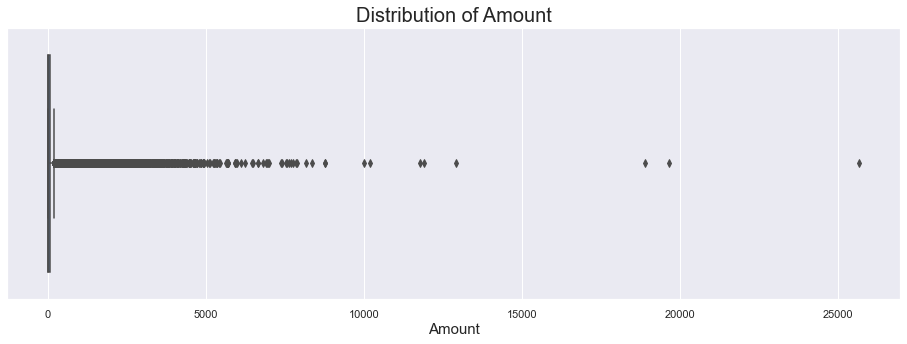

In [25]:
plot_box_graph(series=raw_data.Amount)

#### We see that there is a huge skewness in the amount column. Lets try to map this column with respect to class variable

#### Let's distribute the amount column in 10 different groups (i.e. from 0 to 10%, 10% to 20% etc)
#### After this, we can visualise if there is any pattern observed between Credit Card Fraud and Amount

In [26]:
def amount_binning(x, max_amount):
    if x <= (0.1*max_amount):
        return 'Upto 10%'
    elif x <= (0.2*max_amount):
        return '10% to 20%'
    elif x <= (0.3*max_amount):
        return '20% to 30%'
    elif x <= (0.4*max_amount):
        return '30% to 40%'
    elif x <= (0.5*max_amount):
        return '40% to 50%'
    elif x <= (0.6*max_amount):
        return '50% to 60%'
    elif x <= (0.7*max_amount):
        return '60% to 70%'
    elif x <= (0.8*max_amount):
        return '70% to 80%'
    elif x <= (0.9*max_amount):
        return '80% to 90%'
    else:
        return 'More Than 90%'

In [27]:
raw_data['Amount_Bin'] = raw_data.Amount.apply(amount_binning, args=(max(raw_data.Amount),))

In [28]:
raw_data.groupby(['Amount_Bin', 'Class']).Class.count()

Amount_Bin     Class
10% to 20%     0           360
20% to 30%     0            36
30% to 40%     0            10
40% to 50%     0             2
50% to 60%     0             1
70% to 80%     0             2
More Than 90%  0             1
Upto 10%       0        283903
               1           492
Name: Class, dtype: int64

#### Here, it is observed that all the Credit Cards Fraud that has happened are usually for smaller value. i.e. Less than 2500
#### Said that, we see a strong connectivity between Amount and Credit Card Fraud.
#### As the amount goes on increasing there is almost no chance for Credit Card Fraud

##### Thereby, we will drop the newly created column of Amount_Bin

In [29]:
raw_data = raw_data.drop(columns=['Amount_Bin'])

#### Let's check if we can do outlier treatment wherein we drop top 1% of values (i.e. 0.99 to 1.00 quantile range)

In [30]:
check_class_distribution_on_handling_outlier(series_name='Amount', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281475        |        2840         |      1.0 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         483         |          9          |      1.83 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Now, to drop these outliers is subjective matter
#### Case 1: Can be dropped ad the Class 1 values are not getting altered that much.
#### Case 2: If the outliers are removed, we might loose on a very important factor that High Amount eads to almost no Frauds. This essential bhaviour might be lost if this outliers are removed.

#### for this case, we will continue to keep the outliers

## 4.5. V1

In [31]:
raw_data.V1.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
0%      -5.640751e+01
10%     -1.893272e+00
20%     -1.134663e+00
30%     -7.472943e-01
40%     -4.267559e-01
50%      1.810880e-02
60%      1.035107e+00
70%      1.224825e+00
80%      1.694936e+00
90%      2.015409e+00
100%     2.454930e+00
max      2.454930e+00
Name: V1, dtype: float64

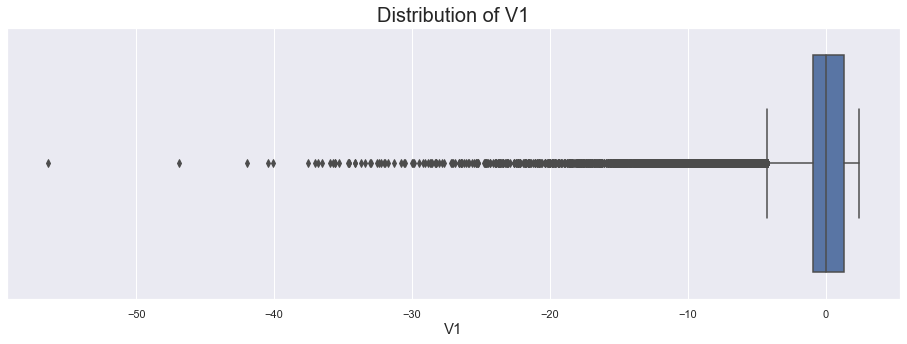

In [32]:
plot_box_graph(series=raw_data.V1)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [33]:
check_class_distribution_on_handling_outlier(series_name='V1', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281582        |        2733         |      0.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         376         |         116         |     23.58 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 24% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.6. V2

In [34]:
raw_data.V2.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
0%      -7.271573e+01
10%     -1.359862e+00
20%     -7.908142e-01
30%     -4.363931e-01
40%     -1.538049e-01
50%      6.548556e-02
60%      3.027378e-01
70%      6.368450e-01
80%      9.573136e-01
90%      1.326635e+00
100%     2.205773e+01
max      2.205773e+01
Name: V2, dtype: float64

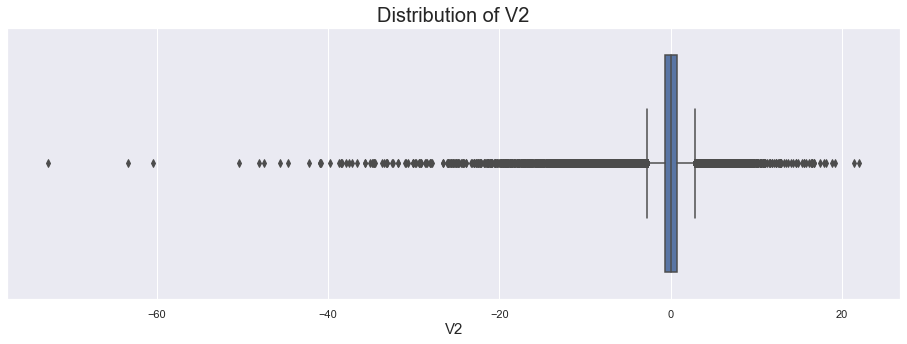

In [35]:
plot_box_graph(series=raw_data.V2)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [36]:
check_class_distribution_on_handling_outlier(series_name='V2', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281472        |        2843         |      1.0 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         486         |          6          |      1.22 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 1.2%
#### Therefore we can drop these values

In [37]:
raw_data = raw_data[
    (raw_data['V2'] >= raw_data['V2'].quantile(0.01)) & 
    (raw_data['V2'] <= raw_data['V2'].quantile(1.00))
]

## 4.7. V3

In [38]:
raw_data.V3.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.018062
std           1.476742
min         -33.680984
0%          -33.680984
10%          -1.781283
20%          -1.150780
30%          -0.600779
40%          -0.187586
50%           0.186050
60%           0.501966
70%           0.847060
80%           1.217419
90%           1.676386
100%          9.382558
max           9.382558
Name: V3, dtype: float64

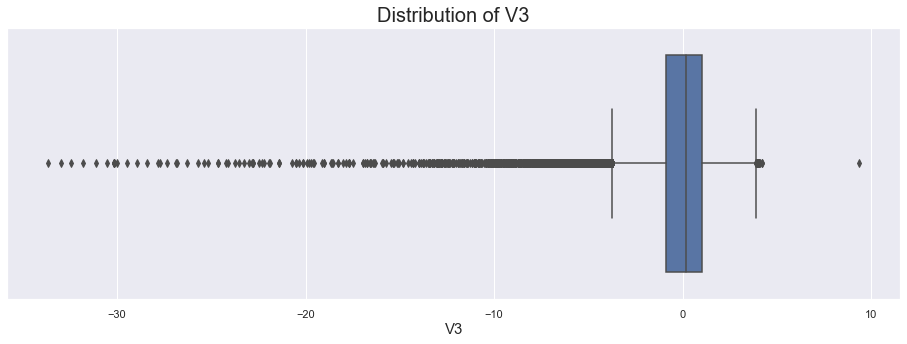

In [39]:
plot_box_graph(series=raw_data.V3)

#### In the above graph, we see that the graph is slightly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [40]:
check_class_distribution_on_handling_outlier(series_name='V3', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278963        |        5352         |      1.88 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         175         |         317         |     64.43 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 64% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.8. V4

In [41]:
raw_data.V4.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.017614
std           1.391189
min          -5.683171
0%           -5.683171
10%          -1.661756
20%          -1.073008
30%          -0.702556
40%          -0.403770
50%          -0.029077
60%           0.275276
70%           0.547546
80%           0.967564
90%           1.455796
100%         12.114672
max          12.114672
Name: V4, dtype: float64

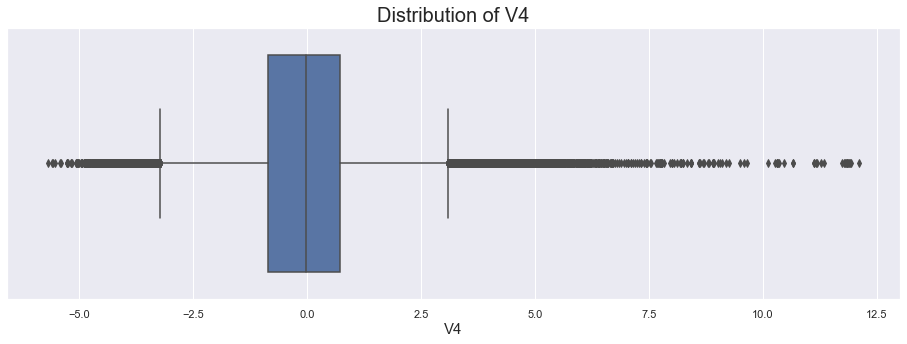

In [42]:
plot_box_graph(series=raw_data.V4)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.9. V5

In [43]:
raw_data.V5.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.009766
std           1.224929
min         -31.356750
0%          -31.356750
10%          -1.283888
20%          -0.851292
30%          -0.540402
40%          -0.288567
50%          -0.054945
60%           0.184108
70%           0.451687
80%           0.790224
90%           1.374734
100%         21.120137
max          21.120137
Name: V5, dtype: float64

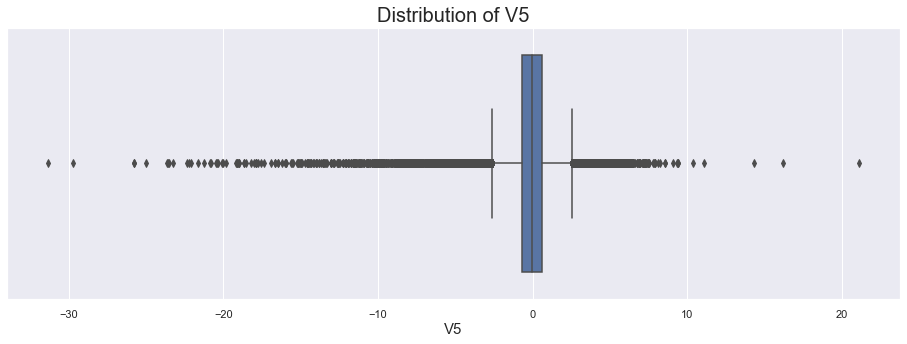

In [44]:
plot_box_graph(series=raw_data.V5)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.10. V6

In [45]:
raw_data.V6.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.009256
std           1.269325
min         -14.352986
0%          -14.352986
10%          -1.156930
20%          -0.872516
30%          -0.664461
40%          -0.477251
50%          -0.273448
60%          -0.048993
70%           0.220781
80%           0.623665
90%           1.494456
100%         21.307738
max          21.307738
Name: V6, dtype: float64

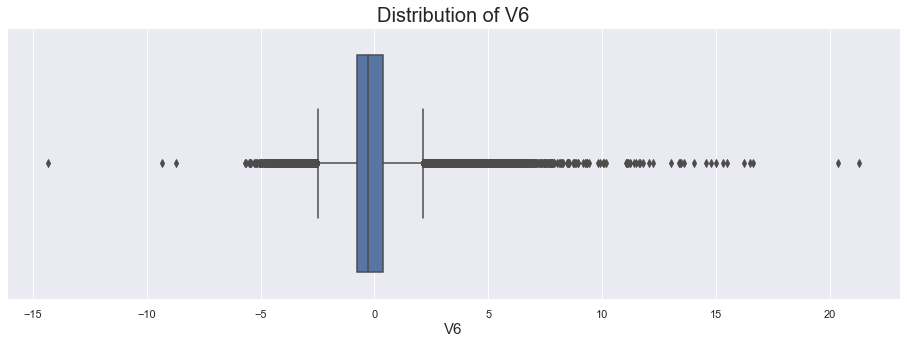

In [46]:
plot_box_graph(series=raw_data.V6)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [47]:
check_class_distribution_on_handling_outlier(series_name='V6', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278660        |        5655         |      1.99 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         478         |         14          |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by more than 2% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.11. V7

In [48]:
raw_data.V7.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.003810
std           1.102978
min         -43.557242
0%          -43.557242
10%          -1.065370
20%          -0.678002
30%          -0.423122
40%          -0.159015
50%           0.039027
60%           0.210665
70%           0.440632
80%           0.689830
90%           1.024571
100%         31.527244
max          31.527244
Name: V7, dtype: float64

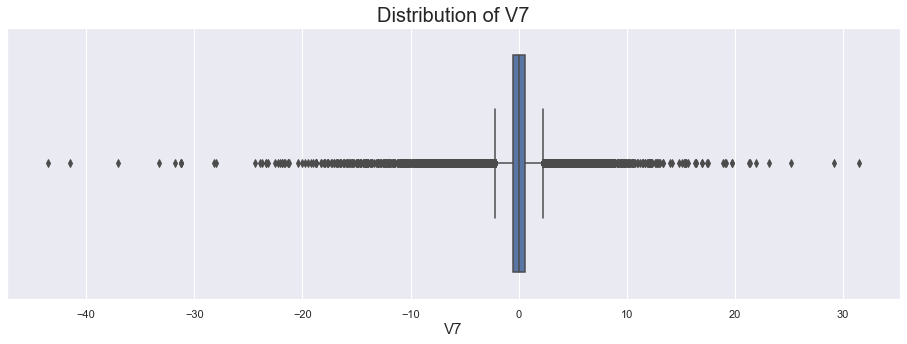

In [49]:
plot_box_graph(series=raw_data.V7)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.12. V8

In [50]:
raw_data.V8.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.004173
std           1.186765
min         -73.216718
0%          -73.216718
10%          -0.449687
20%          -0.262673
30%          -0.156123
40%          -0.064929
50%           0.022912
60%           0.120533
70%           0.242603
80%           0.433234
90%           0.765809
100%         20.007208
max          20.007208
Name: V8, dtype: float64

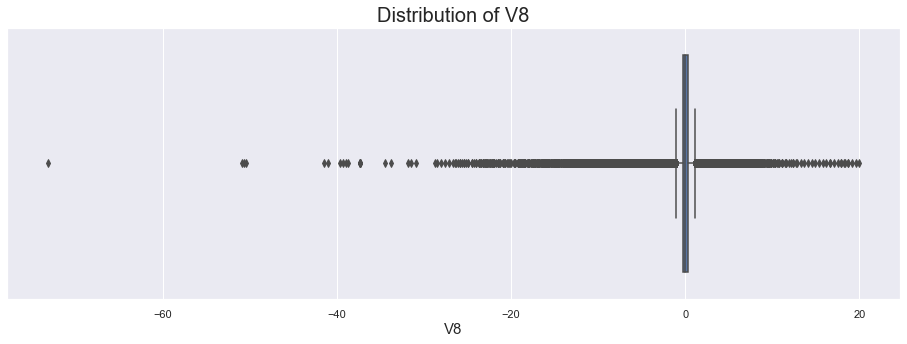

In [51]:
plot_box_graph(series=raw_data.V8)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [52]:
check_class_distribution_on_handling_outlier(series_name='V8', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278684        |        5631         |      1.98 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         454         |         38          |      7.72 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by more than 7% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.13. V9

In [53]:
raw_data.V9.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.002642
std           1.090891
min         -13.434066
0%          -13.434066
10%          -1.289818
20%          -0.806352
30%          -0.501160
40%          -0.257620
50%          -0.052279
60%           0.174089
70%           0.442611
80%           0.786784
90%           1.293297
100%         15.594995
max          15.594995
Name: V9, dtype: float64

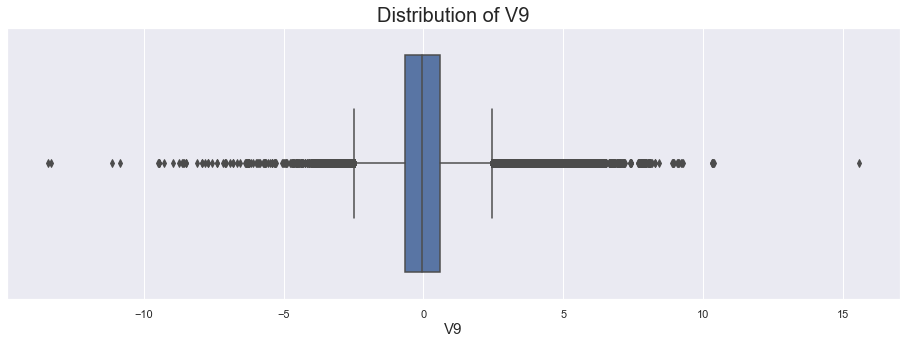

In [54]:
plot_box_graph(series=raw_data.V9)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.14. V10

In [55]:
raw_data.V10.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.000272
std           1.079361
min         -24.588262
0%          -24.588262
10%          -1.026294
20%          -0.662930
30%          -0.424250
40%          -0.247449
50%          -0.092997
60%           0.058647
70%           0.267108
80%           0.644882
90%           1.110393
100%         23.745136
max          23.745136
Name: V10, dtype: float64

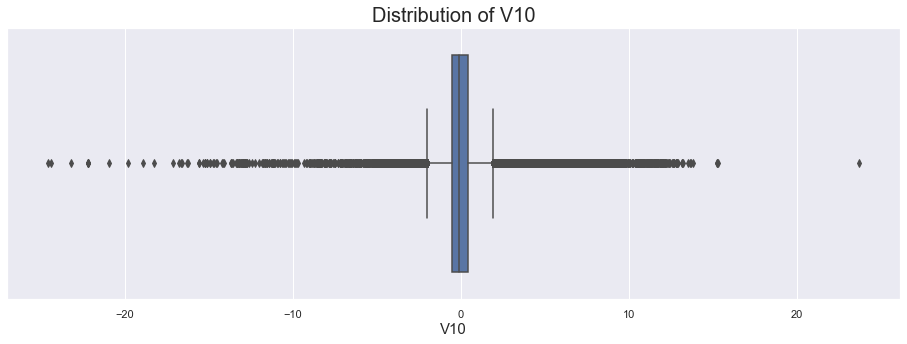

In [56]:
plot_box_graph(series=raw_data.V10)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### Let's calculate the number of minority class instances that would have been reduced on removing outliers

In [57]:
check_class_distribution_on_handling_outlier(series_name='V10', quantile_val_low=0.00, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278654        |        5661         |      1.99 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         484         |          8          |      1.63 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by less than 2%
#### Therefore we can drop these values

In [58]:
raw_data = raw_data[
    (raw_data['V10'] >= raw_data['V10'].quantile(0.0)) & 
    (raw_data['V10'] <= raw_data['V10'].quantile(0.99))
]

## 4.15. V11

In [59]:
raw_data.V11.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.007872
std           1.014332
min          -4.797473
0%           -4.797473
10%          -1.290238
20%          -0.919839
30%          -0.617339
40%          -0.323488
50%          -0.040333
60%           0.258678
70%           0.569269
80%           0.902688
90%           1.307149
100%         12.018913
max          12.018913
Name: V11, dtype: float64

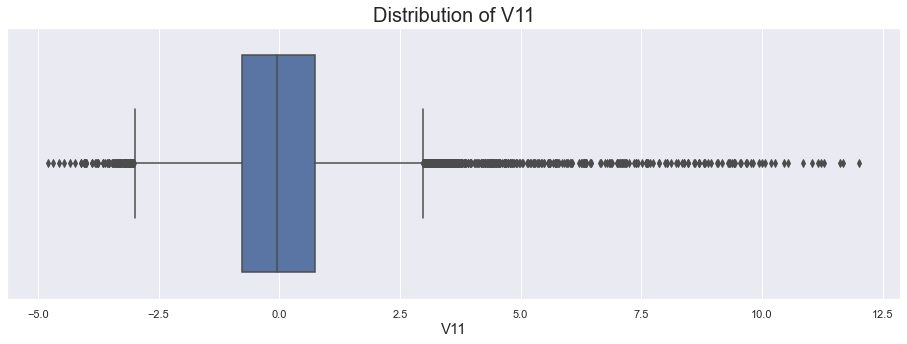

In [60]:
plot_box_graph(series=raw_data.V11)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [61]:
check_class_distribution_on_handling_outlier(series_name='V11', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276209        |        8106         |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         140         |         352         |     71.54 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 71% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.16. V12

In [62]:
raw_data.V12.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.000842
std           0.996788
min         -18.683715
0%          -18.683715
10%          -1.144797
20%          -0.569716
30%          -0.270221
40%          -0.049328
50%           0.140218
60%           0.324190
70%           0.515100
80%           0.727921
90%           1.013370
100%          7.848392
max           7.848392
Name: V12, dtype: float64

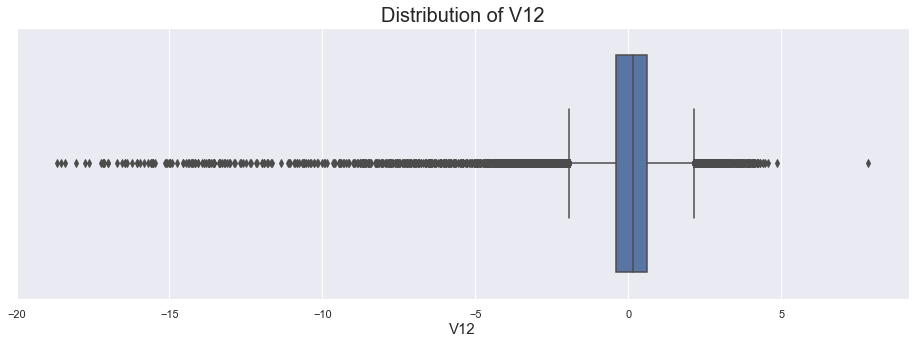

In [63]:
plot_box_graph(series=raw_data.V12)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [64]:
check_class_distribution_on_handling_outlier(series_name='V12', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276225        |        8090         |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         121         |         371         |     75.41 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 75% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.17. V13

In [65]:
raw_data.V13.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.001205
std           0.995431
min          -5.791881
0%           -5.791881
10%          -1.282877
20%          -0.826491
30%          -0.498663
40%          -0.240428
50%          -0.014296
60%           0.228102
70%           0.504737
80%           0.828888
90%           1.251484
100%          4.569009
max           4.569009
Name: V13, dtype: float64

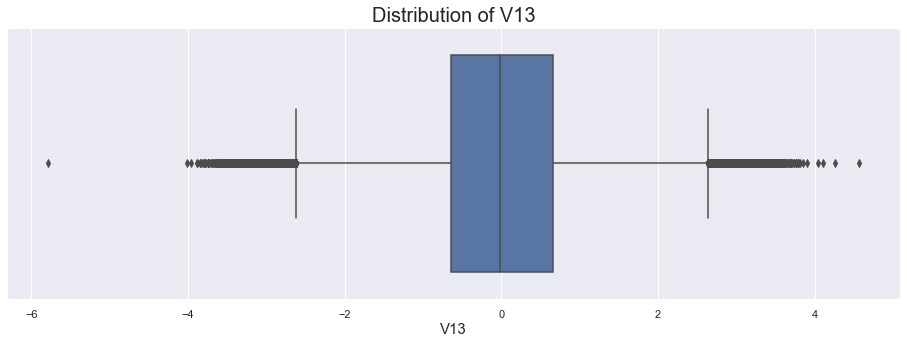

In [66]:
plot_box_graph(series=raw_data.V13)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.18. V14

In [67]:
raw_data.V14.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.012170
std           0.932997
min         -19.214325
0%          -19.214325
10%          -0.973611
20%          -0.551627
30%          -0.303608
40%          -0.113821
50%           0.054373
60%           0.218405
70%           0.394280
80%           0.607267
90%           0.976865
100%         10.526766
max          10.526766
Name: V14, dtype: float64

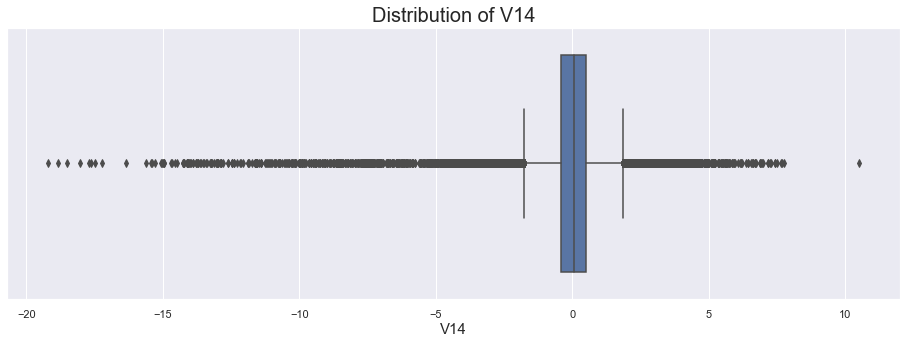

In [68]:
plot_box_graph(series=raw_data.V14)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [69]:
check_class_distribution_on_handling_outlier(series_name='V14', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276271        |        8044         |      2.83 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         75          |         417         |     84.76 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 85% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.19. V15

In [70]:
raw_data.V15.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.005729
std           0.911320
min          -4.498945
0%           -4.498945
10%          -1.176971
20%          -0.752317
30%          -0.441834
40%          -0.193257
50%           0.043310
60%           0.267670
70%           0.508997
80%           0.789387
90%           1.118100
100%          4.198583
max           4.198583
Name: V15, dtype: float64

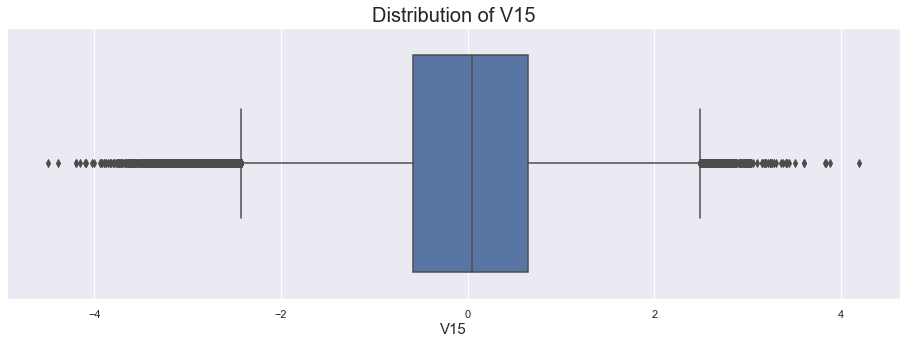

In [71]:
plot_box_graph(series=raw_data.V15)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.20. V16

In [72]:
raw_data.V16.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.002380
std           0.867200
min         -14.129855
0%          -14.129855
10%          -1.046173
20%          -0.606022
30%          -0.335743
40%          -0.120471
50%           0.069727
60%           0.243562
70%           0.427137
80%           0.640368
90%           0.985648
100%          5.477283
max           5.477283
Name: V16, dtype: float64

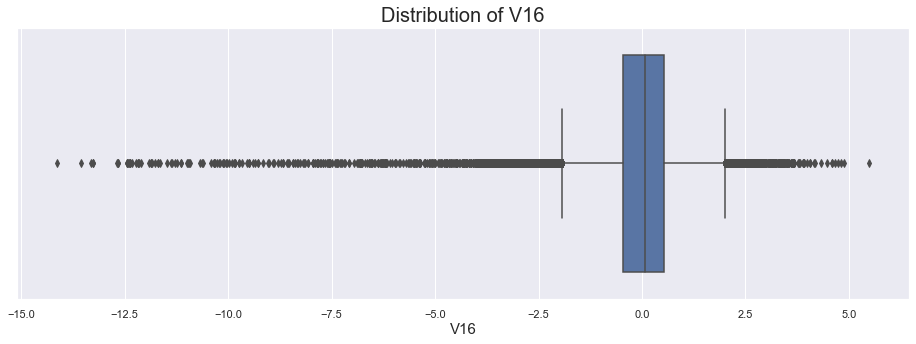

In [73]:
plot_box_graph(series=raw_data.V16)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [74]:
check_class_distribution_on_handling_outlier(series_name='V16', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276177        |        8138         |      2.86 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         169         |         323         |     65.65 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 65% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.21. V17

In [75]:
raw_data.V17.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.003504
std           0.845334
min         -25.162799
0%          -25.162799
10%          -0.796075
20%          -0.570700
30%          -0.392796
40%          -0.232574
50%          -0.063879
60%           0.105970
70%           0.297197
80%           0.518409
90%           0.907410
100%          9.253526
max           9.253526
Name: V17, dtype: float64

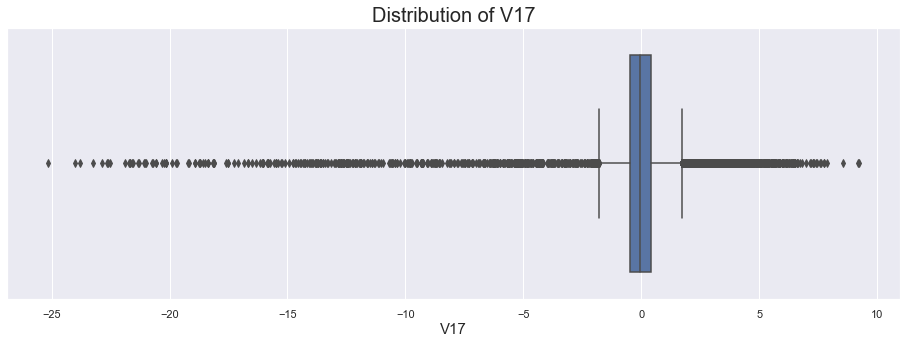

In [76]:
plot_box_graph(series=raw_data.V17)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [77]:
check_class_distribution_on_handling_outlier(series_name='V17', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276227        |        8088         |      2.84 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         119         |         373         |     75.81 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 76% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.22. V18

In [78]:
raw_data.V18.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.002542
std           0.834653
min          -9.498746
0%           -9.498746
10%          -0.972767
20%          -0.622502
30%          -0.381708
40%          -0.181894
50%          -0.000448
60%           0.184176
70%           0.384057
80%           0.637520
90%           1.018396
100%          4.295648
max           4.295648
Name: V18, dtype: float64

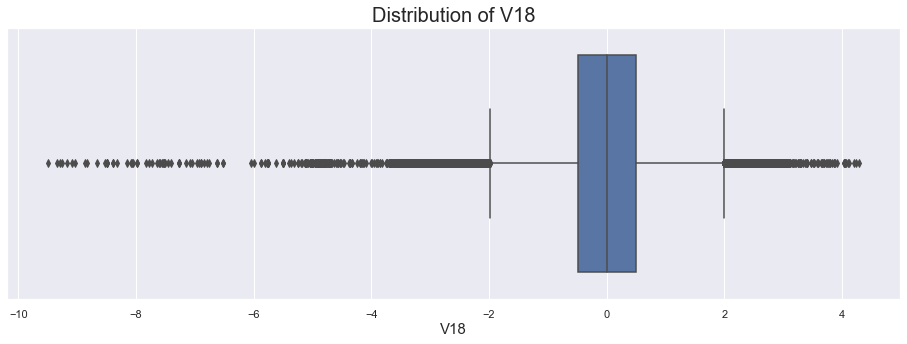

In [79]:
plot_box_graph(series=raw_data.V18)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [80]:
check_class_distribution_on_handling_outlier(series_name='V18', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276082        |        8233         |      2.9 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         264         |         228         |     46.34 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 46% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.23. V19

In [81]:
raw_data.V19.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.004171
std           0.807585
min          -4.932733
0%           -4.932733
10%          -0.975013
20%          -0.573589
30%          -0.337248
40%          -0.156902
50%           0.008547
60%           0.170988
70%           0.350946
80%           0.586898
90%           0.951633
100%          5.228342
max           5.228342
Name: V19, dtype: float64

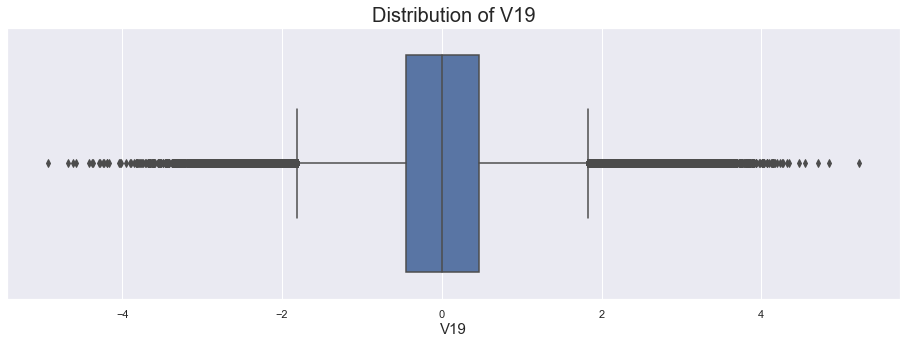

In [82]:
plot_box_graph(series=raw_data.V19)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.24. V20

In [83]:
raw_data.V20.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.024691
std           0.483121
min         -10.637028
0%          -10.637028
10%          -0.384792
20%          -0.251070
30%          -0.179849
40%          -0.122771
50%          -0.065885
60%          -0.001115
70%           0.075157
80%           0.180081
90%           0.392147
100%         16.756448
max          16.756448
Name: V20, dtype: float64

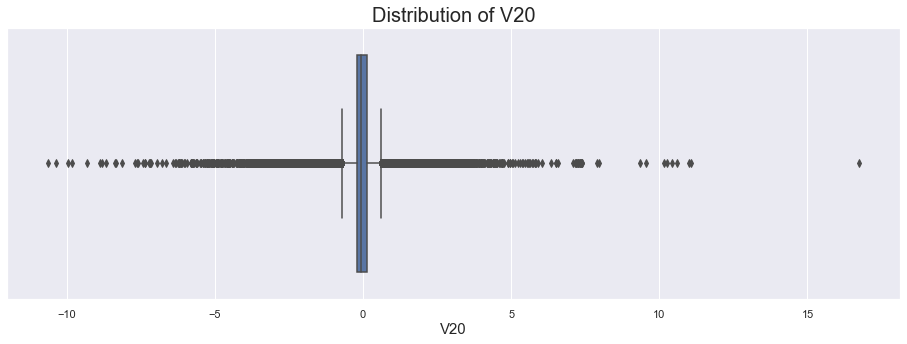

In [84]:
plot_box_graph(series=raw_data.V20)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [85]:
check_class_distribution_on_handling_outlier(series_name='V20', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275915        |        8400         |      2.95 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         431         |         61          |      12.4 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 12% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.25. V21

In [86]:
raw_data.V21.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.002933
std           0.695240
min         -34.830382
0%          -34.830382
10%          -0.356216
20%          -0.262175
30%          -0.183607
40%          -0.103548
50%          -0.028070
60%           0.050638
70%           0.136625
80%           0.232182
90%           0.366289
100%         27.202839
max          27.202839
Name: V21, dtype: float64

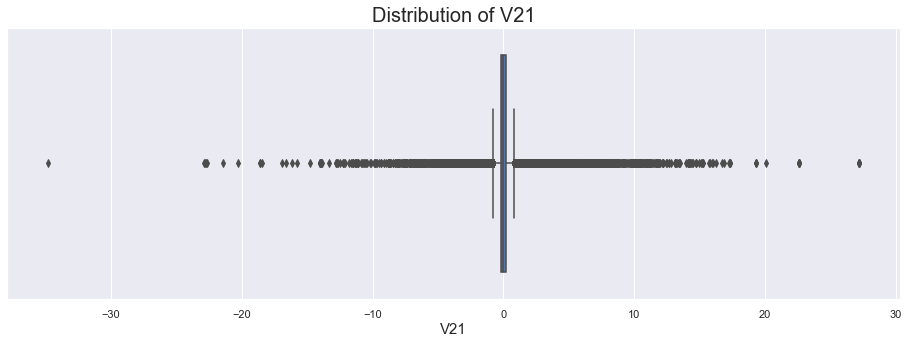

In [87]:
plot_box_graph(series=raw_data.V21)

#### In the above graph, we see that the graph is slightly
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [88]:
check_class_distribution_on_handling_outlier(series_name='V21', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275899        |        8416         |      2.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         447         |         45          |      9.15 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 9% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.26. V22

In [89]:
raw_data.V22.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.003339
std           0.716121
min          -8.887017
0%           -8.887017
10%          -0.859730
20%          -0.637478
30%          -0.430305
40%          -0.198548
50%           0.008369
60%           0.201063
70%           0.412008
80%           0.647589
90%           0.913037
100%         10.503090
max          10.503090
Name: V22, dtype: float64

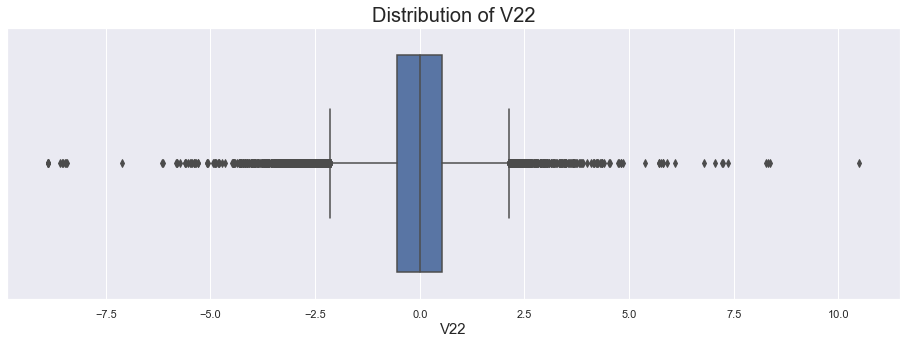

In [90]:
plot_box_graph(series=raw_data.V22)

#### In the above graph, we see that the graph is slightly skewed towards both the sides
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [91]:
check_class_distribution_on_handling_outlier(series_name='V22', quantile_val_low=0.005, quantile_val_high=0.995)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275898        |        8417         |      2.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         448         |         44          |      8.94 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 9% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.27. V23

In [92]:
raw_data.V23.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.001188
std           0.438847
min         -23.222016
0%          -23.222016
10%          -0.320417
20%          -0.200521
30%          -0.124658
40%          -0.064591
50%          -0.011388
60%           0.043751
70%           0.107243
80%           0.190211
90%           0.333047
100%          7.441508
max           7.441508
Name: V23, dtype: float64

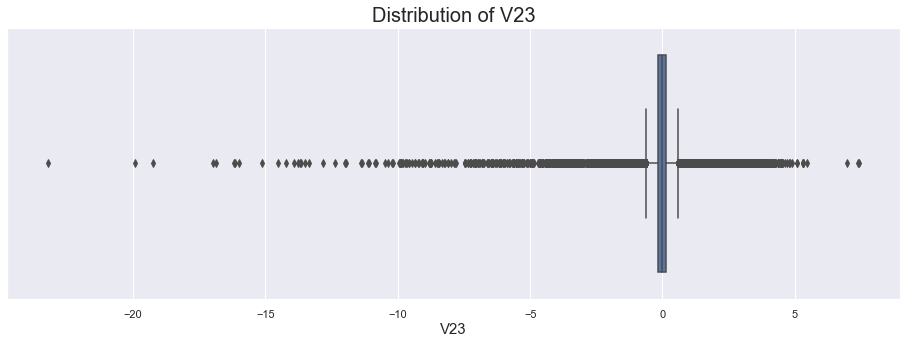

In [93]:
plot_box_graph(series=raw_data.V23)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [94]:
check_class_distribution_on_handling_outlier(series_name='V23', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275904        |        8411         |      2.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         442         |         50          |     10.16 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 10% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.28. V24

In [95]:
raw_data.V24.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.000200
std           0.604703
min          -2.836627
0%           -2.836627
10%          -0.870075
20%          -0.443879
30%          -0.264100
40%          -0.045543
50%           0.040879
60%           0.165369
70%           0.374026
80%           0.531929
90%           0.704996
100%          4.022866
max           4.022866
Name: V24, dtype: float64

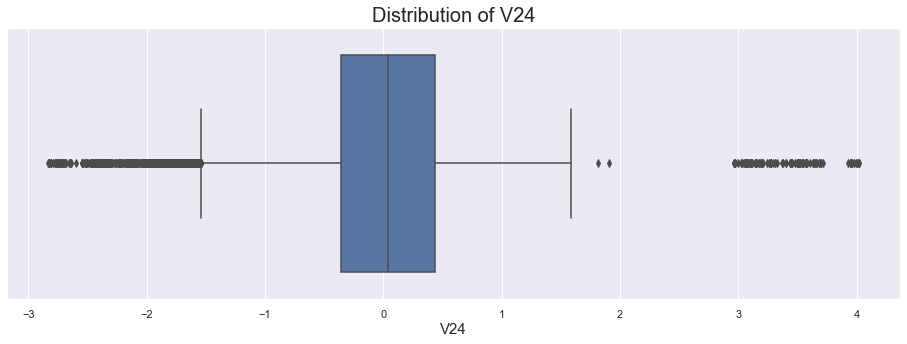

In [96]:
plot_box_graph(series=raw_data.V24)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [97]:
check_class_distribution_on_handling_outlier(series_name='V24', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275863        |        8452         |      2.97 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         483         |          9          |      1.83 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 1.8%
#### Therefore we can drop these values

In [98]:
raw_data = raw_data[
    (raw_data['V24'] >= raw_data['V24'].quantile(0.0)) & 
    (raw_data['V24'] <= raw_data['V24'].quantile(0.99))
]

## 4.29. V25

In [99]:
raw_data.V25.describe(percentiles=np.linspace(0, 1, 11))

count    276346.000000
mean         -0.003232
std           0.504381
min          -4.930750
0%           -4.930750
10%          -0.600389
20%          -0.389998
30%          -0.258563
40%          -0.130478
50%           0.013253
60%           0.155043
70%           0.280808
80%           0.412698
90%           0.590679
100%          2.791635
max           2.791635
Name: V25, dtype: float64

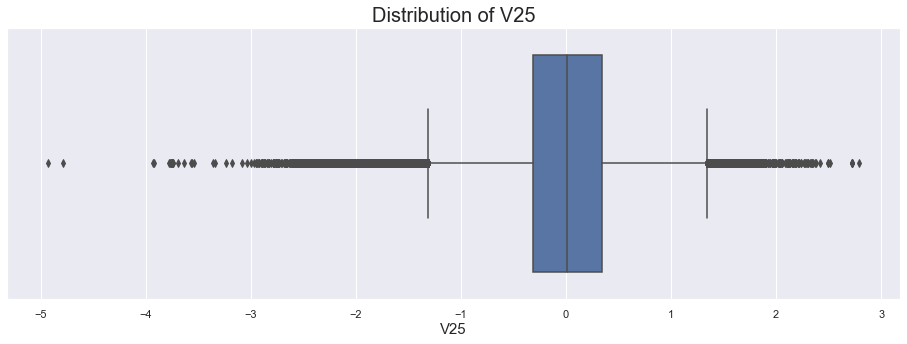

In [100]:
plot_box_graph(series=raw_data.V25)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [101]:
check_class_distribution_on_handling_outlier(series_name='V25', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       273126        |        11189        |      3.94 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         456         |         36          |      7.32 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 7% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.30. V26

In [102]:
raw_data.V26.describe(percentiles=np.linspace(0, 1, 11))

count    276346.000000
mean         -0.001413
std           0.479847
min          -1.855355
0%           -1.855355
10%          -0.546450
20%          -0.388848
30%          -0.274813
40%          -0.166962
50%          -0.053530
60%           0.085690
70%           0.173747
80%           0.353791
90%           0.683632
100%          3.517346
max           3.517346
Name: V26, dtype: float64

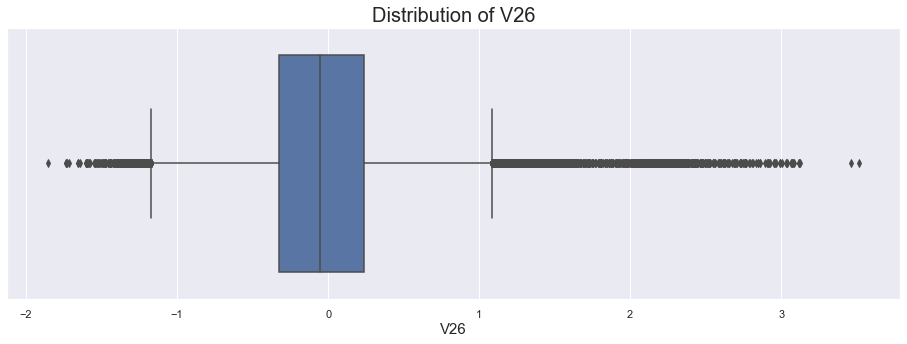

In [103]:
plot_box_graph(series=raw_data.V26)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [104]:
check_class_distribution_on_handling_outlier(series_name='V26', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       273106        |        11209        |      3.94 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         476         |         16          |      3.25 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by XXXX% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

In [105]:
raw_data = raw_data[
    (raw_data['V26'] >= raw_data['V26'].quantile(0.0)) & 
    (raw_data['V26'] <= raw_data['V26'].quantile(0.99))
]

## 4.31. V27

In [106]:
raw_data.V27.describe(percentiles=np.linspace(0, 1, 11))

count    273582.000000
mean         -0.002121
std           0.313383
min          -8.878665
0%           -8.878665
10%          -0.194201
20%          -0.086487
30%          -0.051504
40%          -0.022937
50%           0.002363
60%           0.029501
70%           0.062343
80%           0.130625
90%           0.256887
100%          6.211230
max           6.211230
Name: V27, dtype: float64

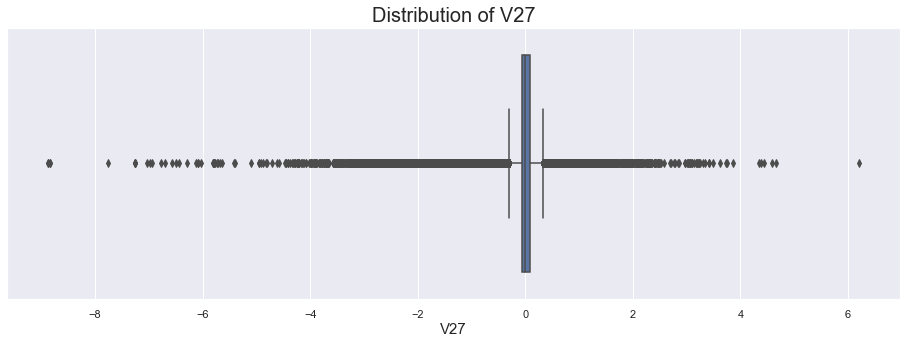

In [107]:
plot_box_graph(series=raw_data.V27)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [108]:
check_class_distribution_on_handling_outlier(series_name='V27', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       270426        |        13889        |      4.89 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         420         |         72          |     14.63 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 14% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.32. V28

In [109]:
raw_data.V28.describe(percentiles=np.linspace(0, 1, 11))

count    273582.000000
mean          0.001258
std           0.196892
min          -8.364853
0%           -8.364853
10%          -0.144941
20%          -0.063960
30%          -0.039570
40%          -0.011405
50%           0.011298
60%           0.026587
70%           0.051615
80%           0.098218
90%           0.171572
100%          5.678671
max           5.678671
Name: V28, dtype: float64

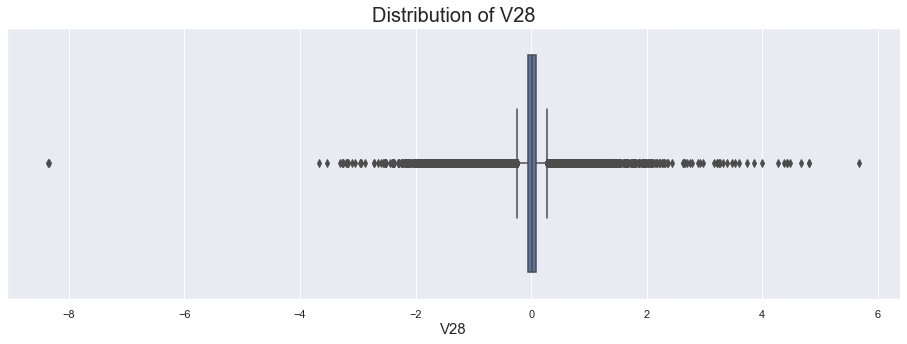

In [110]:
plot_box_graph(series=raw_data.V28)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [111]:
check_class_distribution_on_handling_outlier(series_name='V28', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       270416        |        13899        |      4.89 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         430         |         62          |      12.6 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 12.6% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

# 5. <a id = "header1_5">Data Preprocesing for Modelling</a>

## 5.1. Define Input & Output values

In [112]:
y = raw_data.pop('Class')

In [113]:
X = raw_data

## 5.2. Scaling Amount Column

In [114]:
# scaler = MinMaxScaler()

In [115]:
# df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [116]:
# X['Amount'] = df_scaled['Amount']

## 5.3. Splitting Data as Train & Test Data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314, stratify=y)

In [118]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [119]:
y_test.value_counts()

0    54622
1       95
Name: Class, dtype: int64

# 6. <a id = "header1_6">Data Modelling on Sampled Data</a>

## 6.1. <a id = "header2_6_1">Logistic Regression</a>

In [120]:
def get_max_p_val_variable(model):
    temp = pd.DataFrame(model.pvalues)
    temp = temp[temp[0] == temp[0].max()]
    var_with_max_p_value = list(temp.index)[0]
    max_p_value = list(temp[0].values)[0]
    return var_with_max_p_value, max_p_value

In [121]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [122]:
counter = 1
col = X_train.columns
while True:
    logm1 = sm.GLM(list(y_train), (sm.add_constant(X_train[col])), family = sm.families.Binomial())
    model = logm1.fit()
    variable, p_val = get_max_p_val_variable(model)
    if p_val < 0.05:
        break

    print('Iteration No. ' + str(counter) + " | " + str(variable) + " | " + str(p_val))
    print('#'*100)
    col = col.drop(variable, 1)
    counter+=1

Iteration No. 1 | V1 | 0.9407298912845449
####################################################################################################
Iteration No. 2 | V25 | 0.9451351692547986
####################################################################################################
Iteration No. 3 | V15 | 0.868649313831221
####################################################################################################
Iteration No. 4 | V9 | 0.8420757847054081
####################################################################################################
Iteration No. 5 | V3 | 0.82289534385775
####################################################################################################
Iteration No. 6 | V7 | 0.8855054717179097
####################################################################################################
Iteration No. 7 | V19 | 0.6615293065281227
####################################################################################################

In [123]:
fetch_vif_df(X_train)

,Features,VIF
0,Amount,3.66
1,V2,2.46
2,V5,2.12
3,V7,2.08
4,V1,1.69
5,V10,1.54
6,V6,1.47
7,V20,1.47
8,V3,1.41
9,V9,1.30


In [124]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
pred_probs_train = model.predict_proba(X_train)

In [125]:
y_train_pred_final = pd.DataFrame(y_train)
y_train_pred_final['class_probability'] = pred_probs_train[:,1]
# numbers = [float(x)/10 for x in range(10)]
numbers = np.arange(0.0, 0.0020, 0.0001)
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.class_probability.map(lambda x: 1 if x > i else 0)

In [126]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i])
    accuracy = (cm1[0, 0] + cm1[1, 1]) / sum(sum(cm1))
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0000,0.0000,0.001741,1.000000,0.000000
0.0001,0.0001,0.286231,0.992126,0.285000
0.0002,0.0002,0.518831,0.984252,0.518020
0.0003,0.0003,0.666452,0.976378,0.665911
0.0004,0.0004,0.750878,0.968504,0.750499
0.0005,0.0005,0.804967,0.965879,0.804686
0.0006,0.0006,0.843620,0.958005,0.843421
0.0007,0.0007,0.871843,0.950131,0.871707
0.0008,0.0008,0.891979,0.942257,0.891891
0.0009,0.0009,0.907358,0.939633,0.907302


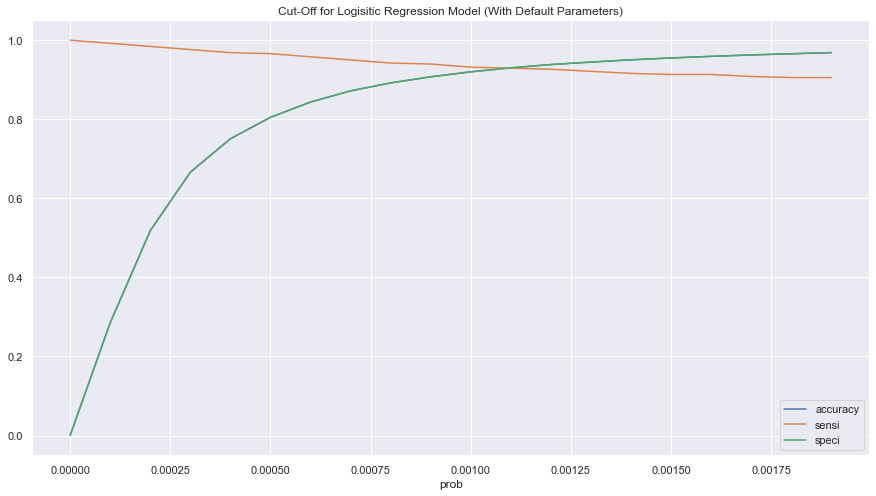

In [127]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Cut-Off for Logisitic Regression Model (With Default Parameters)')
plt.show()

#### From the curve above, 0.0011 seems to be the optimum point to take it as a cutoff probability.

In [128]:
cut_off = 0.0011

In [129]:
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[cut_off])

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train_pred_final.Class, y_train_pred_final.class_probability)
auc_score = round(auc_score*100, 2)

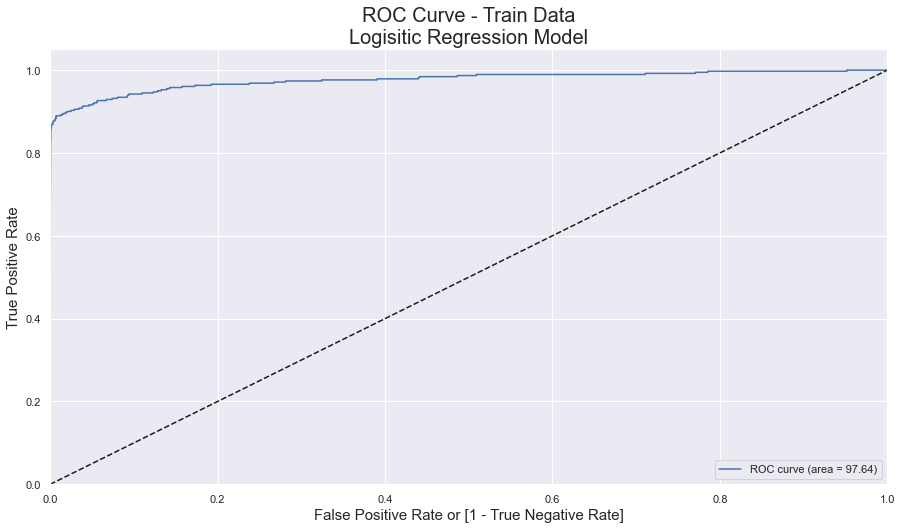

In [130]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC Curve - Train Data\nLogisitic Regression Model', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

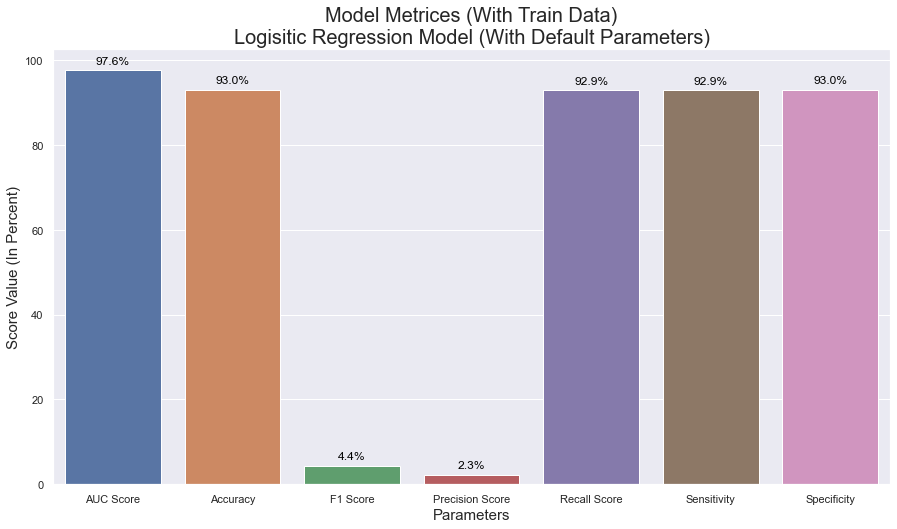

In [131]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Train Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.3.2. Test Data

In [132]:
pred_probs_test = model.predict_proba(X_test)

In [133]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.9821128560113622

In [134]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['class_probability'] = pred_probs_test[:,1]
y_test_pred_final['class_predicted'] = y_test_pred_final.class_probability.map(lambda x: 1 if x > cut_off else 0)
y_test_pred_final

,Class,class_probability,class_predicted
93660,0,0.000265,0
184313,0,0.000074,0
849,0,0.000211,0
36763,0,0.000769,0
98883,0,0.000258,0
...,...,...,...
164287,0,0.000067,0
105359,0,0.000146,0
177345,0,0.000192,0
113054,0,0.000068,0


In [135]:
conf_matrix_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.class_predicted)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.class_probability)
auc_score_test = round(auc_score_test*100, 2)

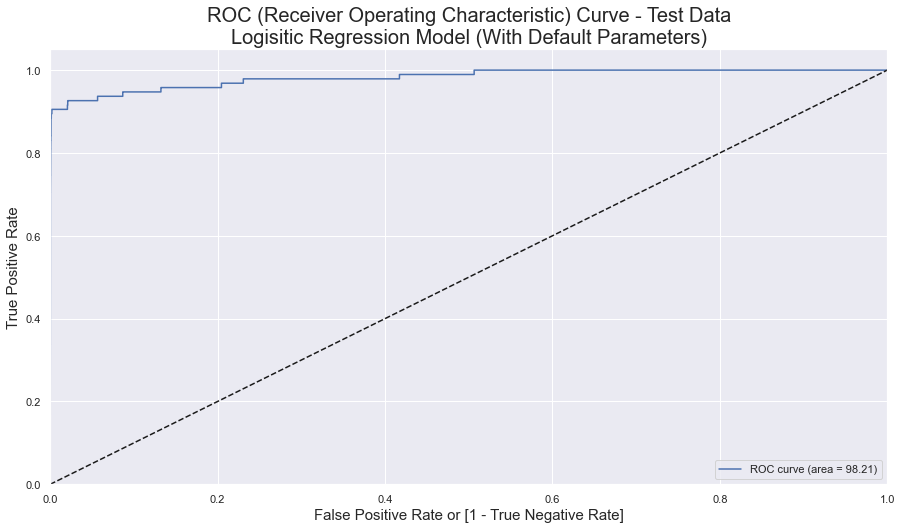

In [136]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Class, y_test_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC (Receiver Operating Characteristic) Curve - Test Data\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

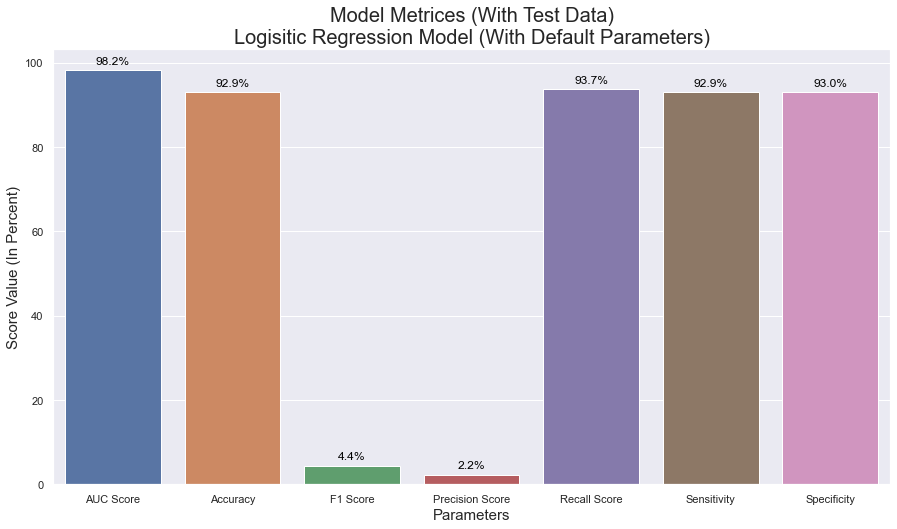

In [137]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Test Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

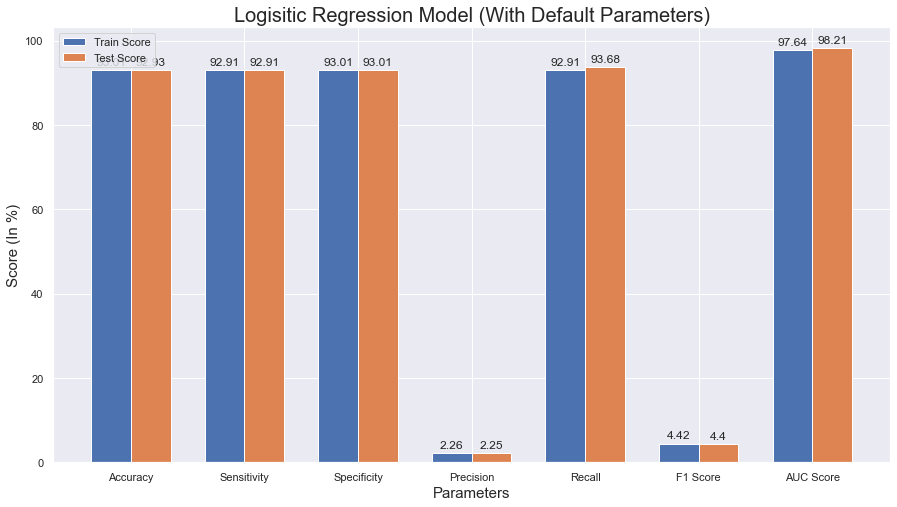

In [138]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Logisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:
1. Recall ==> This model is able to catch only 94% of Frauds
2. Precision ==> Out of all the predicted Frauds, 2% where actually correct

## 6.2. <a id = "header2_6_2">Decision Trees</a>

### 6.2.1. Defining Basic Model

In [139]:
dt_hyp_tuned = DecisionTreeClassifier(random_state=314)

### 6.2.2. Defining Hyperparameters

In [140]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [141]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.2.3. Cross Fold Training

In [142]:
dt_hyp_tuned = GridSearchCV(estimator=dt_hyp_tuned, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

In [143]:
dt_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [144]:
score_df = pd.DataFrame(dt_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,5.048406,0.019143,0.019539,0.006769,entropy,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.962005,0.956667,0.983210,0.924026,0.956477,0.021203,1
34,3.098597,0.012961,0.019539,0.006768,entropy,3,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.961974,0.940209,0.965883,0.928353,0.949105,0.015467,2
37,5.036685,0.012960,0.019537,0.006768,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.951634,0.956965,0.972928,0.913534,0.948766,0.021798,3
38,5.052316,0.012960,0.015629,0.000002,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.961799,0.946373,0.983327,0.903075,0.948643,0.029401,4
32,3.153302,0.020304,0.015630,0.000002,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.951006,0.940370,0.966013,0.928410,0.946450,0.013837,5


In [145]:
dt_best_est = dt_hyp_tuned.best_estimator_
dt_best_est

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       random_state=314)

In [146]:
pred_probs_train = dt_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train, pred_probs_train)
auc_score = round(auc_score*100, 2)

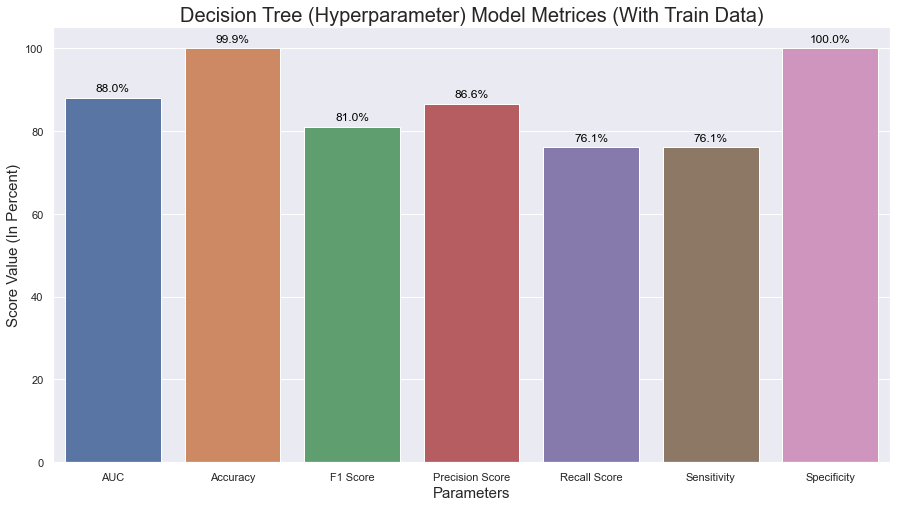

In [148]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.2.4. Implementing best model on Test Data

In [149]:
pred_probs_test = dt_best_est.predict(X_test)
pred_probs_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

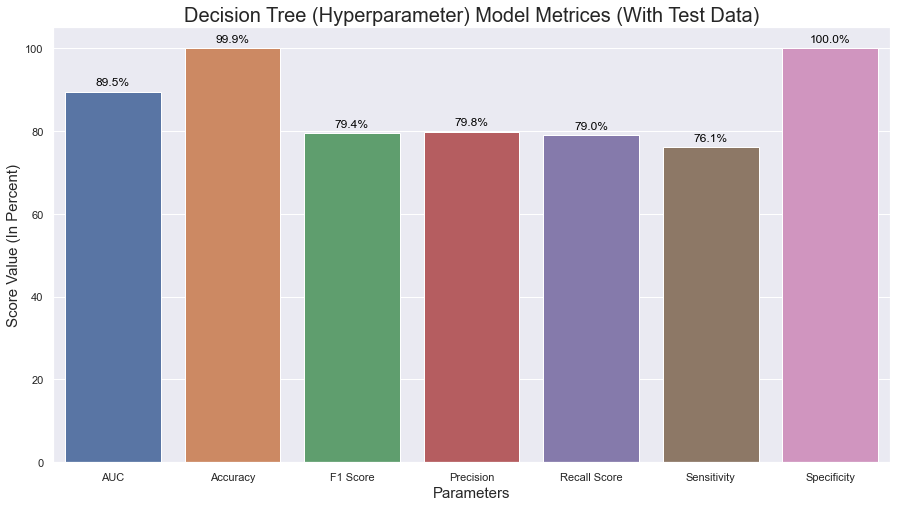

In [151]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

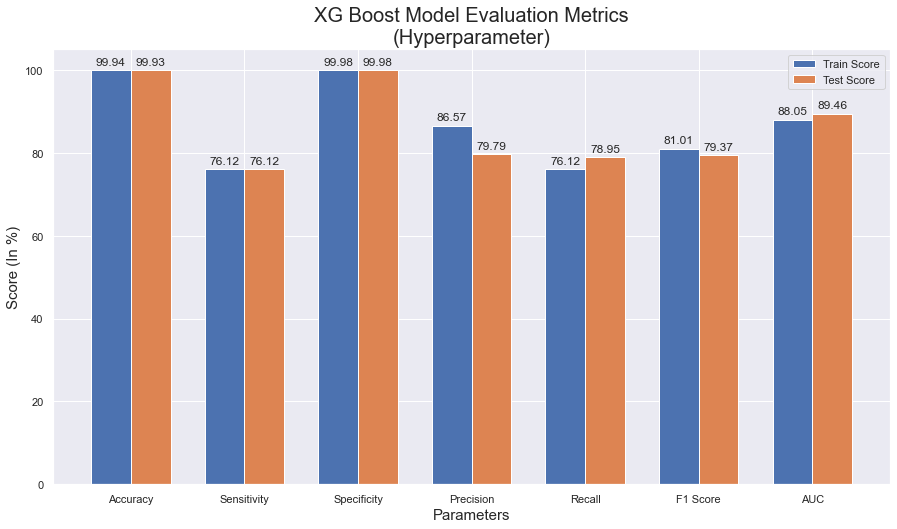

In [152]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:
1. Recall ==> This model is able to catch only 79% of Frauds
2. Precision ==> Out of all the predicted Frauds, 80% where actually correct

## 6.3. <a id = "header2_6_3">Random Forest</a>

### 6.3.1. Defining Basic Model

In [153]:
rf_hyp_tuned = RandomForestClassifier(random_state=314, n_jobs=-1)

### 6.3.2. Defining Hyperparameters

In [154]:
params = {
    'max_depth': [2, 5],
    'min_samples_leaf': [5, 10],
    'max_features': [2, 3],
    'n_estimators': [30, 50]
}

In [155]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.3.3. Cross Fold Training

In [156]:
rf_hyp_tuned_grid = GridSearchCV(estimator=rf_hyp_tuned, param_grid=params, 
                                 cv=4, n_jobs=-1, verbose=1, 
                                 scoring=scorer)

In [157]:
rf_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': [2, 3],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [30, 50]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [158]:
score_df = pd.DataFrame(rf_hyp_tuned_grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,12.288883,2.063432,0.914342,0.714068,5,3,10,50,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.979852,0.950159,0.965302,0.962779,0.964523,0.010547,1
11,10.693593,0.384782,0.543137,0.151688,5,2,10,50,"{'max_depth': 5, 'max_features': 2, 'min_sampl...",0.969431,0.954081,0.965062,0.956740,0.961329,0.006188,2
9,10.331262,0.511859,1.117527,0.544187,5,2,5,50,"{'max_depth': 5, 'max_features': 2, 'min_sampl...",0.972174,0.957392,0.964058,0.950768,0.961098,0.007935,3
14,9.130458,0.408840,1.312899,0.674980,5,3,10,30,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.973001,0.943743,0.965223,0.956537,0.959626,0.010863,4
13,14.273432,0.497326,1.275964,0.334905,5,3,5,50,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.977041,0.948090,0.961614,0.951276,0.959505,0.011291,5


In [159]:
rf_best = rf_hyp_tuned_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=10,
                       n_estimators=50, n_jobs=-1, random_state=314)

### 6.3.4. Implementing best model on Test Data

In [160]:
pred_probs_train = rf_best.predict(X_train)

In [161]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

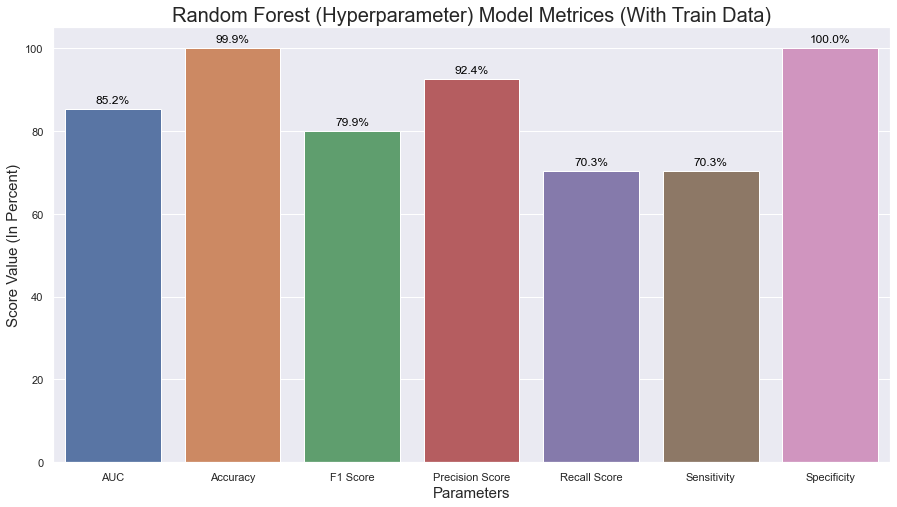

In [162]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [163]:
pred_probs_test = rf_best.predict(X_test)

In [164]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

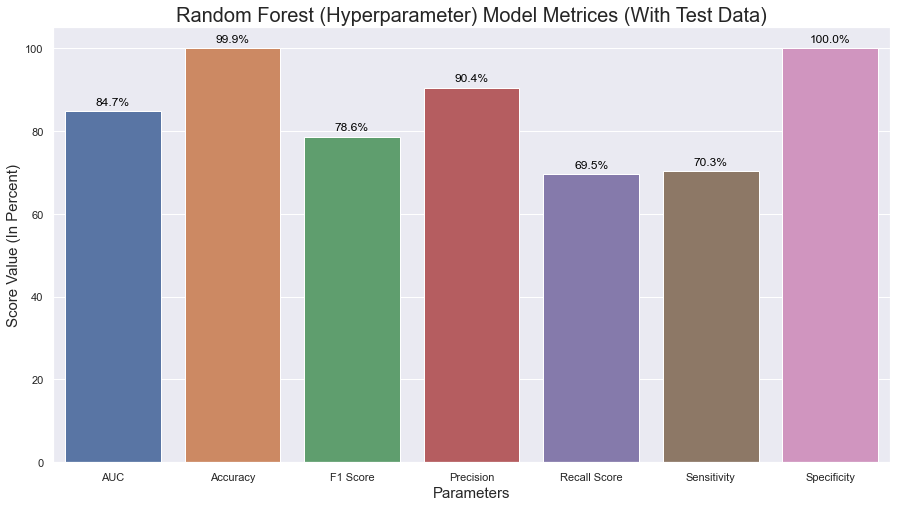

In [165]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

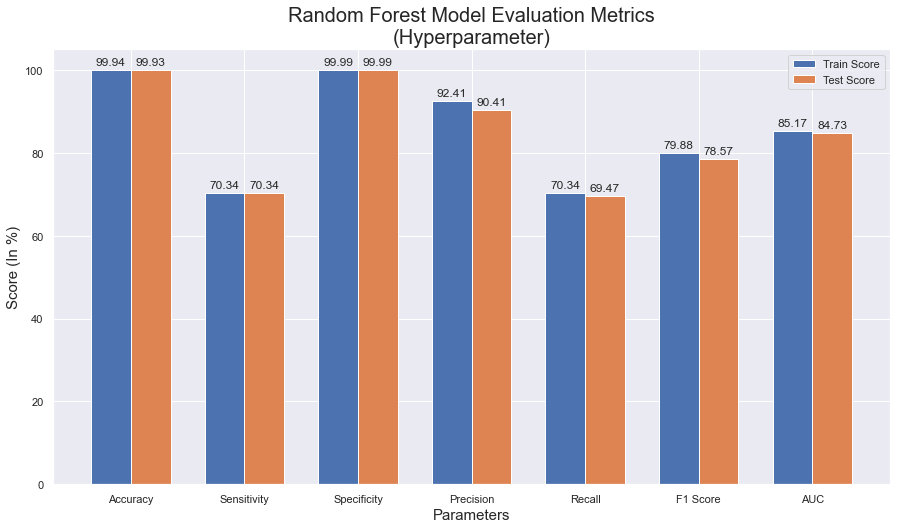

In [166]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Random Forest Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:
1. Recall ==> This model is able to catch only 69% of Frauds
2. Precision ==> Out of all the predicted Frauds, 90% where actually correct

## 6.4. <a id = "header2_6_4">Gradient Boosting</a>

### 6.4.1. Defining Basic Model

In [167]:
gbm_hyp_tuned = GradientBoostingClassifier(random_state=314)

### 6.4.2. Defining Hyperparameters

In [168]:
params = {
    'max_depth': [2, 5],
    'max_features': [2, 3],
    'n_estimators': [30, 50]
}

In [169]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.4.3. Cross Fold Training

In [170]:
gbm_hyp_tuned_grid = GridSearchCV(estimator=gbm_hyp_tuned,
                                  param_grid=params, cv=4, n_jobs=-1,
                                  verbose=1, scoring=scorer)

In [171]:
gbm_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': [2, 3],
                         'n_estimators': [30, 50]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [172]:
score_df = pd.DataFrame(gbm_hyp_tuned_grid.cv_results_)
score_df.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
6,12.894541,0.101891,0.050797,0.006768,5,3,30,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.682097,0.829835,0.918118,0.921480,0.837883,0.097160,1
4,9.416923,0.050038,0.050795,0.006765,5,2,30,"{'max_depth': 5, 'max_features': 2, 'n_estimat...",0.693086,0.838552,0.956597,0.841865,0.832525,0.093489,2
7,21.433380,0.050040,0.058612,0.006768,5,3,50,"{'max_depth': 5, 'max_features': 3, 'n_estimat...",0.652265,0.805548,0.919363,0.942468,0.829911,0.114916,3
5,15.564268,0.057825,0.070336,0.017477,5,2,50,"{'max_depth': 5, 'max_features': 2, 'n_estimat...",0.469076,0.767197,0.969652,0.793627,0.749888,0.179836,4
3,10.014757,0.414024,0.070334,0.007814,2,3,50,"{'max_depth': 2, 'max_features': 3, 'n_estimat...",0.713496,0.563130,0.563662,0.689237,0.632381,0.069516,5


In [173]:
gb_best = gbm_hyp_tuned_grid.best_estimator_
gb_best

GradientBoostingClassifier(max_depth=5, max_features=3, n_estimators=30,
                           random_state=314)

In [174]:
pred_probs_train = gb_best.predict(X_train)

In [175]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

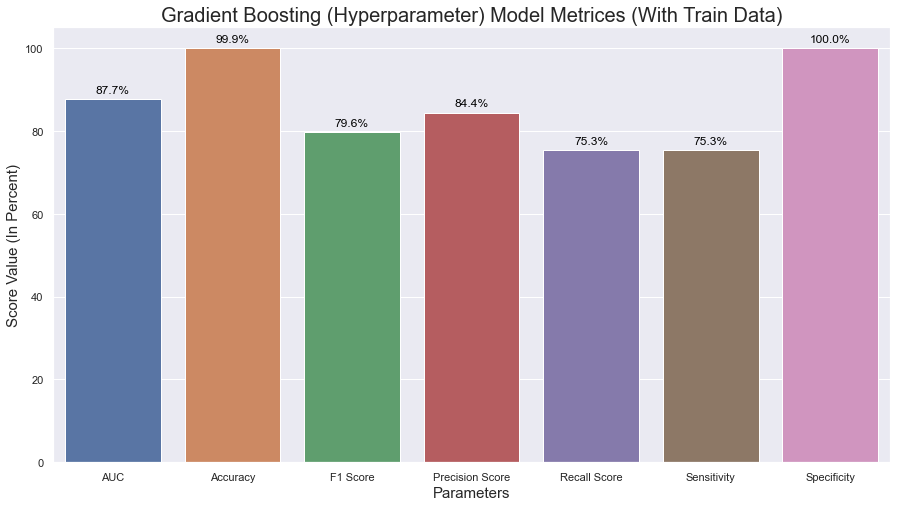

In [176]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.4.4. Implementing best model on Test Data

In [177]:
pred_probs_test = gb_best.predict(X_test)

In [178]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

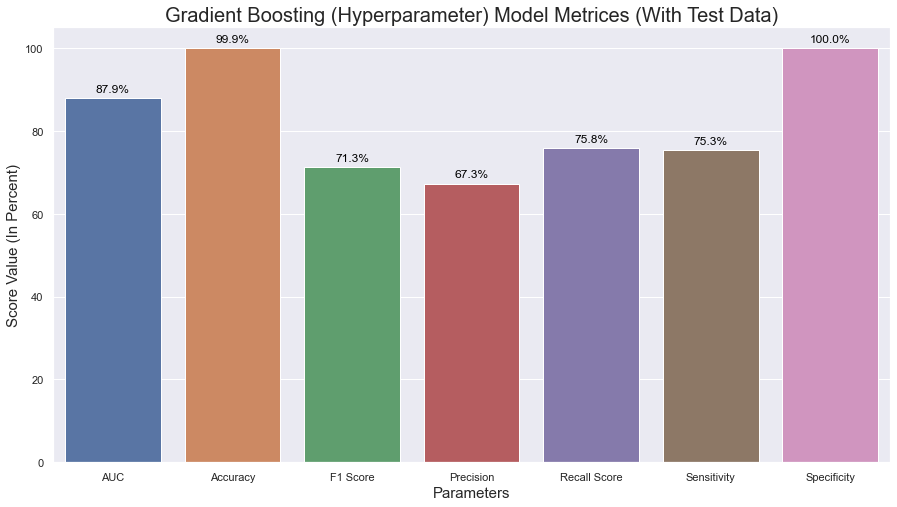

In [179]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

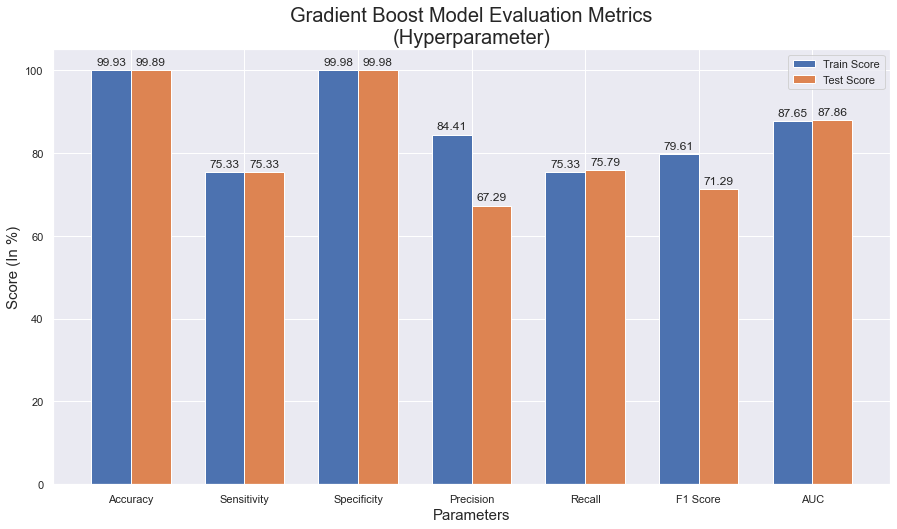

In [180]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Gradient Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:
1. Recall ==> This model is able to catch only 76% of Frauds
2. Precision ==> Out of all the predicted Frauds, 67% where actually correct

## 6.5. <a id = "header2_6_5">XG Boost</a>

### 6.5.1. Defining Basic Model

In [181]:
xgreg = XGBClassifier(random_state=314, n_jobs = -1)

### 6.5.2. Defining Hyperparameters

In [182]:
params = {'learning_rate': [0.35, 0.375], 
          'max_depth': [3, 4], 
          'min_child_weight': [15, 18], 
          'n_estimators': [80, 90, 100]}

In [183]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.5.3. Cross Fold Training

In [184]:
xgboost_hyp_tuned = GridSearchCV(estimator=xgreg, param_grid=params, n_jobs=-1, 
                                 cv=3, scoring=scorer, refit=True)

In [185]:
xgboost_hyp_tuned.fit(X_train, y_train)

[22:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=314,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [186]:
score_df = pd.DataFrame(xgboost_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,22.697220,1.118604,0.093779,0.012762,0.375,4,15,80,"{'learning_rate': 0.375, 'max_depth': 4, 'min_...",0.982576,0.974931,0.985110,0.980872,0.004326,1
19,25.719422,0.926867,0.093780,0.012761,0.375,4,15,90,"{'learning_rate': 0.375, 'max_depth': 4, 'min_...",0.981509,0.974150,0.985068,0.980243,0.004546,2
9,21.990633,0.647836,0.093779,0.012763,0.35,4,18,80,"{'learning_rate': 0.35, 'max_depth': 4, 'min_c...",0.978747,0.973828,0.988130,0.980235,0.005933,3
12,21.610726,0.181526,0.104200,0.007370,0.375,3,15,80,"{'learning_rate': 0.375, 'max_depth': 3, 'min_...",0.981952,0.977912,0.980248,0.980037,0.001656,4
10,24.478099,1.327217,0.072942,0.007370,0.35,4,18,90,"{'learning_rate': 0.35, 'max_depth': 4, 'min_c...",0.978561,0.973480,0.987766,0.979936,0.005913,5


In [187]:
xgboost_best_est = xgboost_hyp_tuned.best_estimator_
xgboost_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.375, max_delta_step=0, max_depth=4,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=-1, num_parallel_tree=1, random_state=314,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
pred_probs_train = xgboost_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

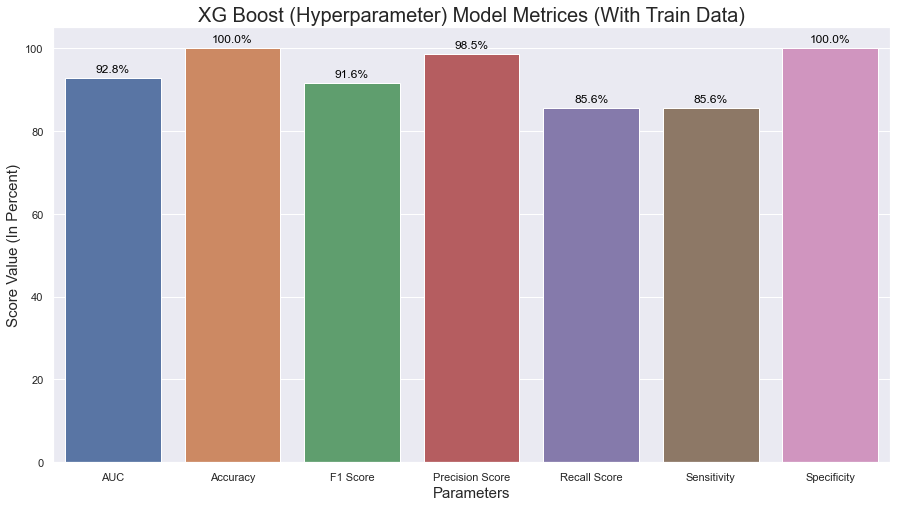

In [190]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.5.4. Implementing best model on Test Data

In [191]:
pred_probs_test = xgboost_best_est.predict(X_test)

In [192]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

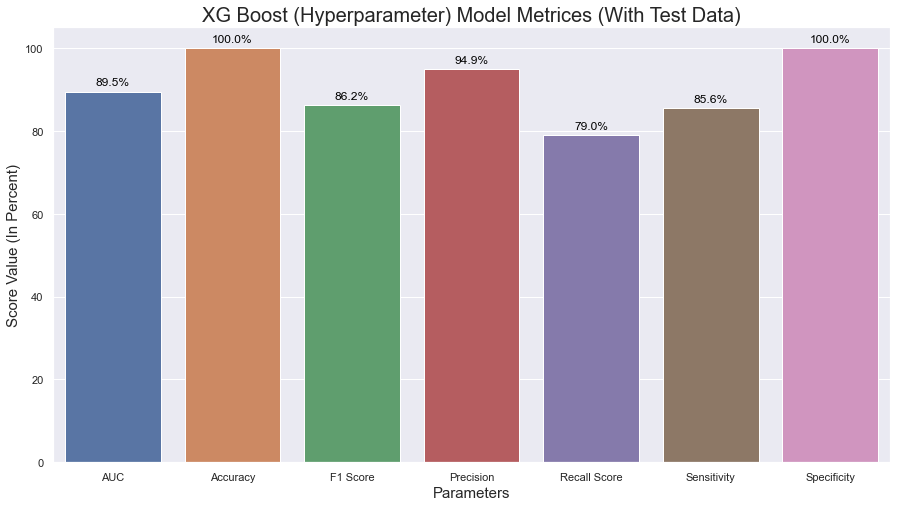

In [193]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

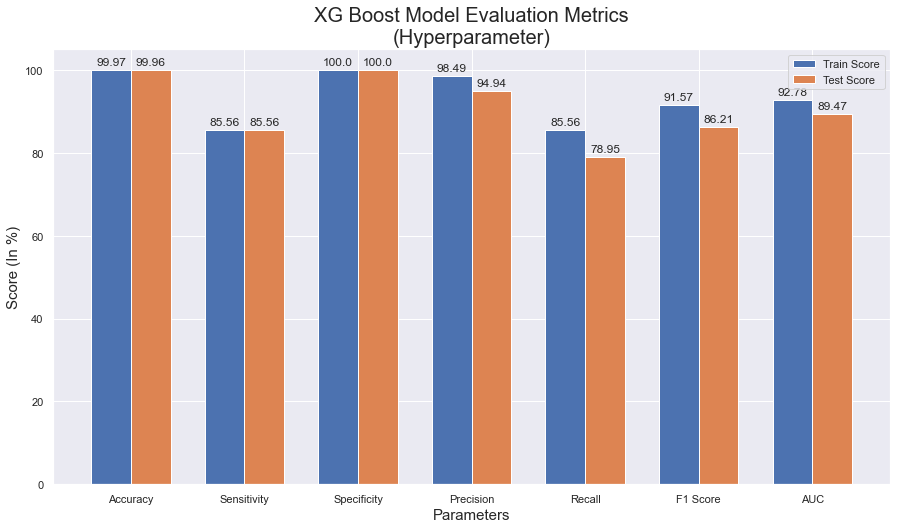

In [194]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:
1. Recall ==> This model is able to catch only 79% of Frauds
2. Precision ==> Out of all the predicted Frauds, 95% where actually correct